# Results: Annual Maximum, Daily Precipitation Depth

Compare the simulated maximum daily precipitation depth on an annual basis to the datasets

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Results'
SIM_ROOT1 = "DC_WGMN1"
SIM_ROOT2 = "DC_WGMN2"
SIM_ROOT3 = "DC_WGMN3"

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Load

Load our previously saved DataFrames

In [5]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_AnnTotPre_All.pickle" % SIM_ROOT1 ) )
DPDF1 = pd.read_pickle( OutFiler, compression='zip' )

In [6]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_AnnTotPre_All.pickle" % SIM_ROOT2 ) )
DPDF2 = pd.read_pickle( OutFiler, compression='zip' )

In [7]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_AnnTotPre_All.pickle" % SIM_ROOT3 ) )
DPDF3 = pd.read_pickle( OutFiler, compression='zip' )

## Plots

In [8]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [9]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_AnnTot_All_BW.svg" ) )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_AnnTot_All_BW.svg'

In [10]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_AnnTot_All_BW.png" ) )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Results_AnnTot_All_BW.png'

In [11]:
preTicks = [ 100.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0 ]

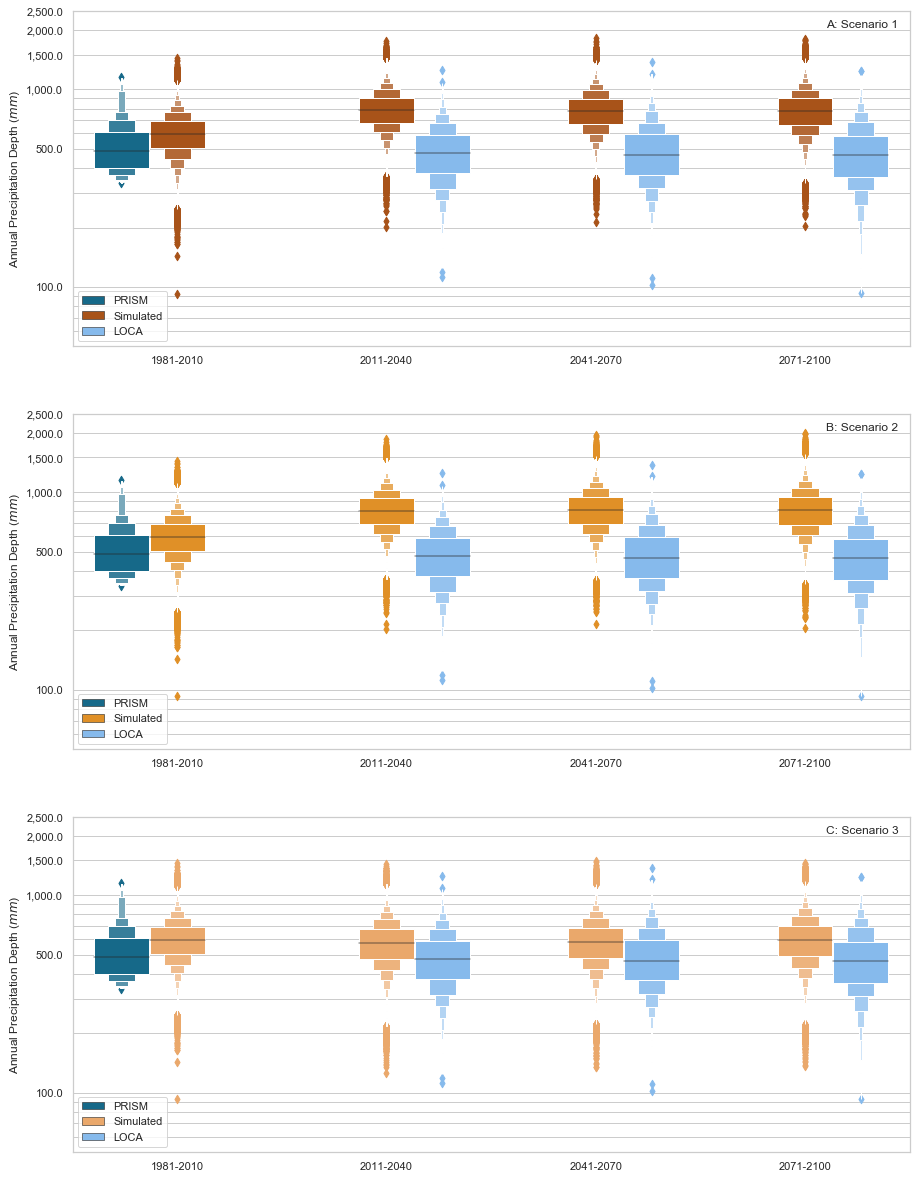

In [12]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(3,1,1)
g1 = sns.boxenplot( x="Interval", y="AnnTot", hue="DLabel",
                    dodge=True, linewidth=1.2, orient="v",
                    palette={ "PRISM" : "xkcd:ocean blue", 
                              "LOCA" : "xkcd:sky blue",
                              "Simulated" : "xkcd:burnt orange", },
                    data=DPDF1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="lower left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Annual Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 50.0, 2500.0 ))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g1.annotate("A: Scenario 1", xy=(0.90,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(3,1,2)
g2 = sns.boxenplot( x="Interval", y="AnnTot", hue="DLabel",
                    dodge=True, linewidth=1.2, orient="v",
                    palette={ "PRISM" : "xkcd:ocean blue", 
                              "LOCA" : "xkcd:sky blue",
                              "Simulated" : "xkcd:tangerine", },
                    data=DPDF2, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="lower left")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Annual Precipitation Depth ($mm$)', fontsize=12)
g2.set_ylim( ( 50.0, 2500.0 ))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g2.annotate("B: Scenario 2", xy=(0.90,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(3,1,3)
g3 = sns.boxenplot( x="Interval", y="AnnTot", hue="DLabel",
                    dodge=True, linewidth=1.2, orient="v",
                    palette={ "PRISM" : "xkcd:ocean blue", 
                              "LOCA" : "xkcd:sky blue",
                              "Simulated" : "xkcd:pale orange", },
                    data=DPDF3, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="lower left")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Annual Precipitation Depth ($mm$)', fontsize=12)
g3.set_ylim( ( 50.0, 2500.0 ))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g3.annotate("C: Scenario 3", xy=(0.90,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [13]:
DPDF1["DLabel"].unique()

array(['PRISM', 'Simulated', 'LOCA'], dtype=object)

In [14]:
nDPDF1 = DPDF1.replace( to_replace="Simulated", value="Scenario 1" )
nDPDF1["DLabel"].unique()

array(['PRISM', 'Scenario 1', 'LOCA'], dtype=object)

In [15]:
nDPDF2 = DPDF2.replace( to_replace="Simulated", value="Scenario 2" )
nDPDF2 = nDPDF2[nDPDF2["DLabel"] == "Scenario 2" ].copy()

In [16]:
nDPDF3 = DPDF3.replace( to_replace="Simulated", value="Scenario 3" )
nDPDF3 = nDPDF3[nDPDF3["DLabel"] == "Scenario 3" ].copy()

In [17]:
All1 = pd.concat( [ nDPDF1, nDPDF2, nDPDF3 ], ignore_index=True )

In [18]:
All1["DLabel"].unique()

array(['PRISM', 'Scenario 1', 'LOCA', 'Scenario 2', 'Scenario 3'],
      dtype=object)

In [19]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Fig_A5-AnnTotScenarios.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Fig_A5-AnnTotScenarios.svg'

In [20]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Fig_A5-AnnTotScenarios.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Fig_A5-AnnTotScenarios.png'

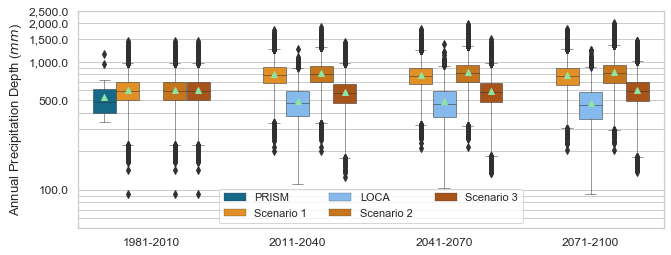

In [24]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.5, 4.0)
ax11 = Fig1.add_subplot()
#g1 = sns.boxenplot( x="Interval", y="AnnTot", hue="DLabel",
#                    dodge=True, linewidth=1.0, orient="v",
#                    palette={ "PRISM" : "xkcd:ocean blue", 
#                              "LOCA" : "xkcd:sky blue",
#                              "Scenario 1" : "xkcd:tangerine",
#                              "Scenario 2" : "xkcd:pumpkin",
#                              "Scenario 3" : "xkcd:burnt orange", },
#                    data=All1, ax=ax11 )
g1 = sns.boxplot( x="Interval", y="AnnTot", hue="DLabel",
                    dodge=True, linewidth=0.5, orient="v", showmeans=True,
                    palette={ "PRISM" : "xkcd:ocean blue", 
                              "LOCA" : "xkcd:sky blue",
                              "Scenario 1" : "xkcd:tangerine",
                              "Scenario 2" : "xkcd:pumpkin",
                              "Scenario 3" : "xkcd:burnt orange", },
                    data=All1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="lower center", ncol=3)
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Annual Precipitation Depth ($mm$)', fontsize=13)
g1.set_ylim( ( 50.0, 2500.0 ))
g1.tick_params(axis='both', which='major', labelsize=12)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )